# va_persontrait_epihiper.txt

- General Info

        Dataset name: virginia

        Title: Virginia v.2.4.0

        Path: virginia_person.csv

        Total population: 7,684,795 individuals

- Schema Overview

| Field             | Description                                                                                                                                                  |
| ----------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| `pid`             | Person ID (Primary key)                                                                                                                                      |
| `hid`             | Household ID                                                                                                                                                 |
| `age`             | Age (0–94)                                                                                                                                                   |
| `age_group`       | Categorical age bracket:<br>• `p`: Preschool (0–4)<br>• `s`: Students (5–17)<br>• `a`: Adults (18–49)<br>• `o`: Older Adults (50–64)<br>• `g`: Seniors (65+) |
| `gender`          | 1 = male, 2 = female                                                                                                                                         |
| `county_fips`     | County FIPS code (many values, detailed below)                                                                                                               |
| `race`            | Race (coded 1–9, see below)                                                                                                                                  |
| `hispanic`        | Hispanic origin (string, no enum defined)                                                                                                                    |
| `smh_race`        | Standardized race code:<br>• `W`, `B`, `L`, `A`, `O`                                                                                                         |
| `occupation_socp` | Standard Occupational Classification (SOCP code)                                                                                                             |
| `designation`     | Industry or designation label (e.g., `retail`, `education`, etc.)                                                                                            |

## Enumerated Category Breakdown

- Age Group Distribution

| Group | Label                | Count     |
| ----- | -------------------- | --------- |
| `p`   | Preschool (0–4)      | 453,982   |
| `s`   | Students (5–17)      | 1,327,589 |
| `a`   | Adults (18–49)       | 3,119,899 |
| `o`   | Older Adults (50–64) | 1,637,505 |
| `g`   | Seniors (65+)        | 1,145,820 |

- Gender Distribution

| Gender       | Count     |
| ------------ | --------- |
| Male (`1`)   | 3,685,817 |
| Female (`2`) | 3,998,978 |

- Race Codes

| Code | Label                                              | Count     |
| ---- | -------------------------------------------------- | --------- |
| 1    | White alone                                        | 5,366,140 |
| 2    | Black or African American alone                    | 1,389,443 |
| 3    | American Indian alone                              | 13,681    |
| 4    | Alaska Native alone                                | 455       |
| 5    | American Indian & Alaska Native (tribes specified) | 4,940     |
| 6    | Asian alone                                        | 475,246   |
| 7    | Native Hawaiian / Pacific Islander                 | 4,269     |
| 8    | Some Other Race                                    | 172,304   |
| 9    | Two or More Races                                  | 258,317   |

- Standardized Race (SMH Race)

| Code | Label  | Count     |
| ---- | ------ | --------- |
| `W`  | White  | 4,966,912 |
| `B`  | Black  | 1,354,964 |
| `L`  | Latino | 638,878   |
| `A`  | Asian  | 470,655   |
| `O`  | Other  | 253,386   |


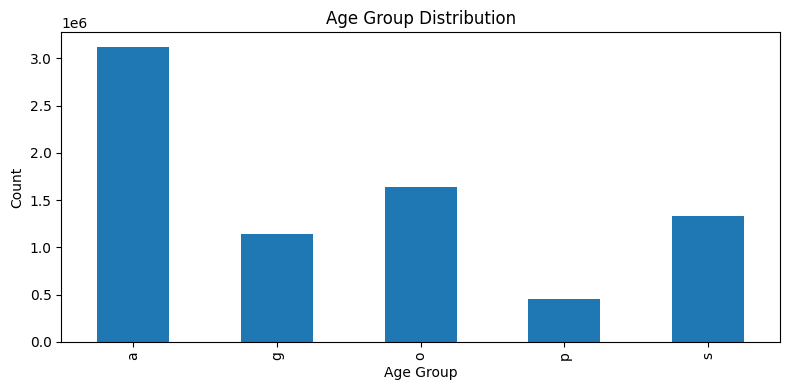

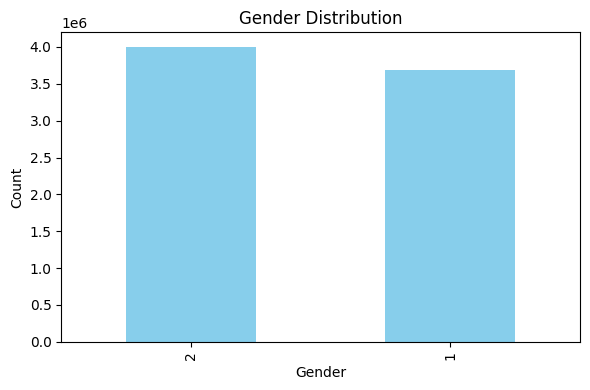

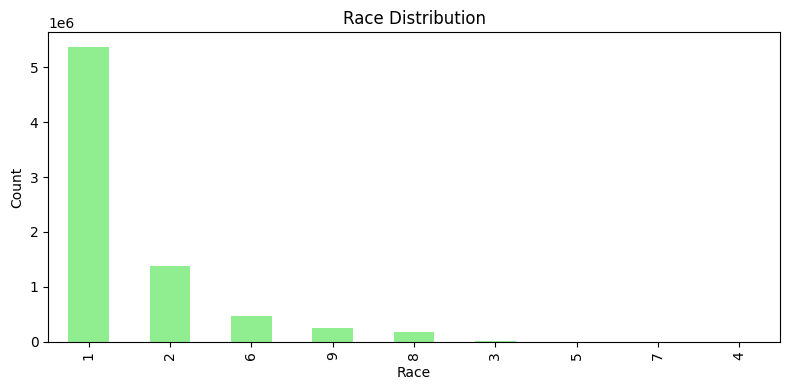

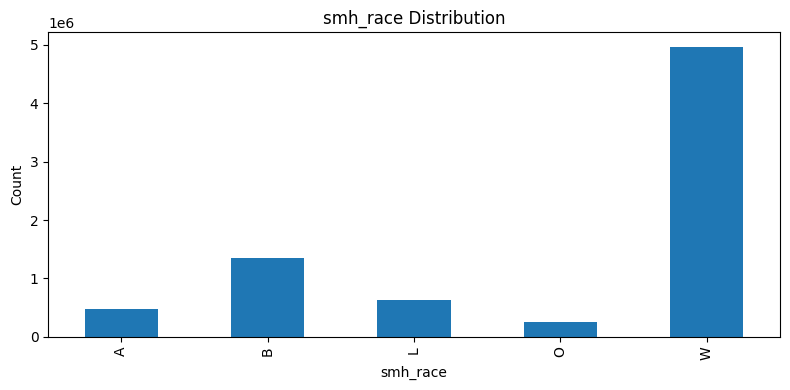

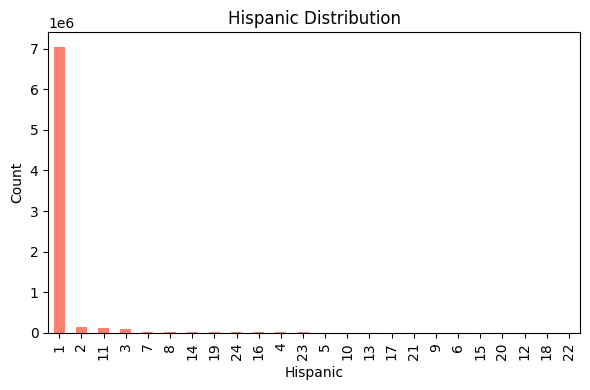

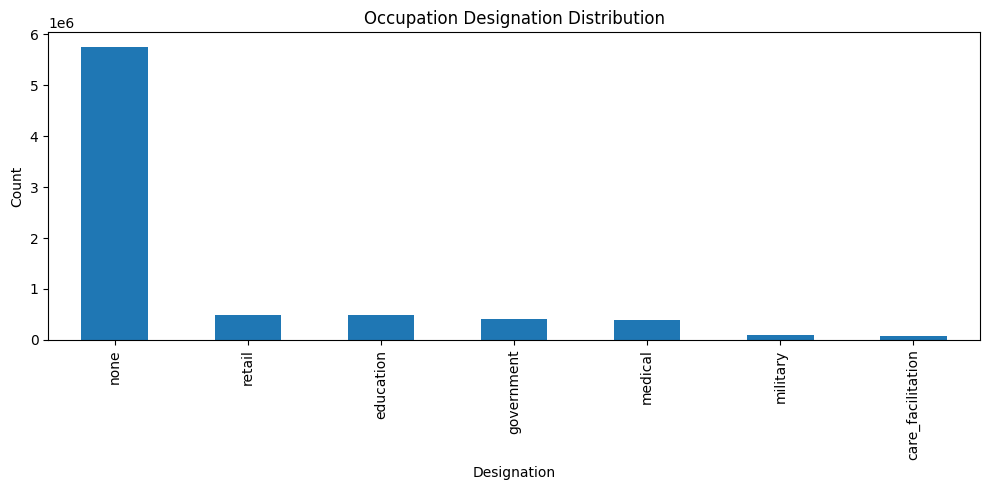

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the file
df = pd.read_csv("va_persontrait_epihiper.txt",sep=",", skiprows=1)

# Ensure clean column names
df.columns = df.columns.str.strip()

# Distribution by age group
plt.figure(figsize=(8, 4))
df['age_group'].value_counts().sort_index().plot(kind='bar')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Distribution by gender
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Distribution by race
plt.figure(figsize=(8, 4))
df['race'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
df['smh_race'].value_counts().sort_index().plot(kind='bar')
plt.title('smh_race Distribution')
plt.xlabel('smh_race')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Hispanic vs Non-Hispanic
plt.figure(figsize=(6, 4))
df['hispanic'].value_counts().plot(kind='bar', color='salmon')
plt.title('Hispanic Distribution')
plt.xlabel('Hispanic')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Distribution by occupation designation
plt.figure(figsize=(10, 5))
df['designation'].value_counts().plot(kind='bar')
plt.title('Occupation Designation Distribution')
plt.xlabel('Designation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


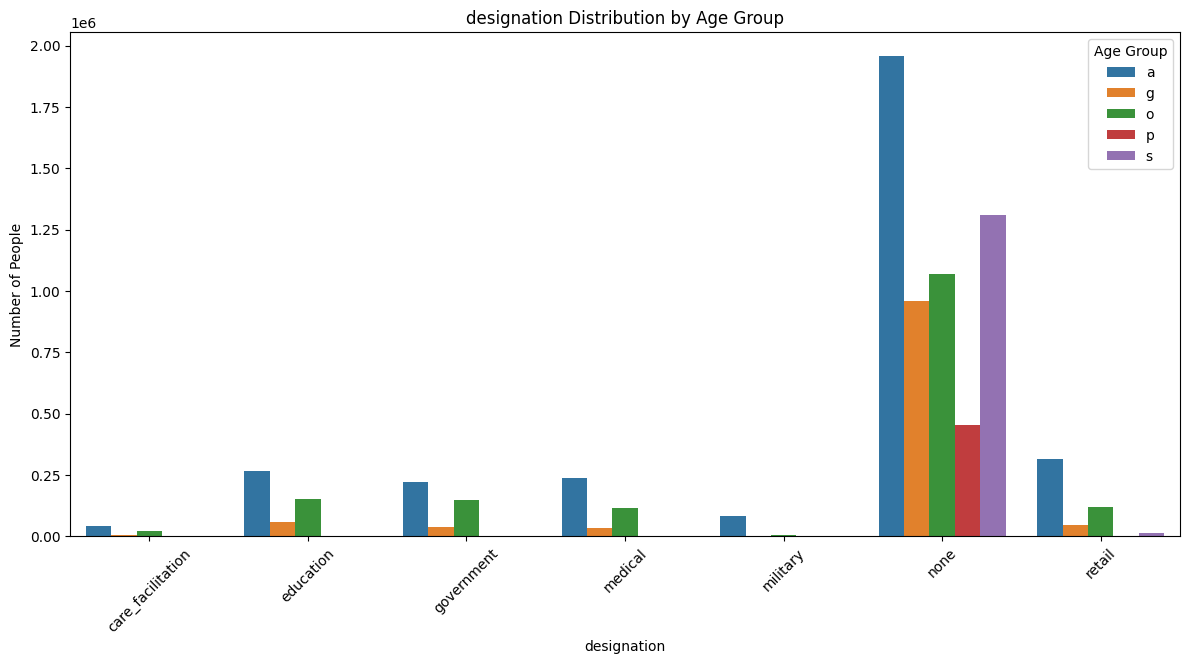

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data, skipping the description line
df = pd.read_csv("va_persontrait_epihiper.txt", sep=",", skiprows=1)

# Clean column names
df.columns = df.columns.str.strip()

# Drop any rows missing age_group or occupation
df = df.dropna(subset=["age_group", "designation"])

# Group and count
grouped = df.groupby(["age_group", "designation"]).size().reset_index(name="count")

# Optional: Show only top 10 occupations in total
top_occ = grouped.groupby("designation")["count"].sum().nlargest(10).index
filtered = grouped[grouped["designation"].isin(top_occ)]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x="designation", y="count", hue="age_group")
plt.title("designation Distribution by Age Group")
plt.xlabel("designation")
plt.ylabel("Number of People")
plt.legend(title="Age Group")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

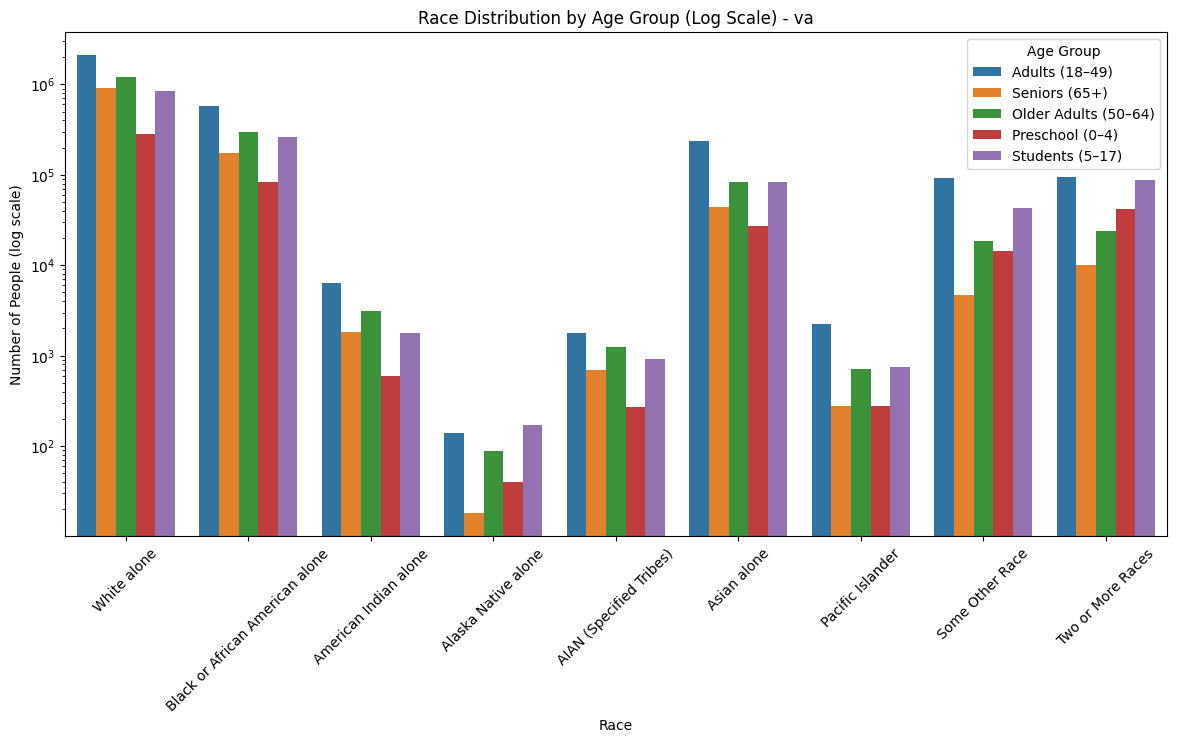

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data, skipping the description line
df = pd.read_csv("va_persontrait_epihiper.txt", sep=",", skiprows=1)

# Clean column names
df.columns = df.columns.str.strip()

# Drop any rows missing age_group or occupation
df = df.dropna(subset=["age_group", "race"])

# Group and count
grouped = df.groupby(["age_group", "race"]).size().reset_index(name="count")

# Map age_group codes to labels
age_map = {
    "p": "Preschool (0–4)",
    "s": "Students (5–17)",
    "a": "Adults (18–49)",
    "o": "Older Adults (50–64)",
    "g": "Seniors (65+)"
}

grouped["age_label"] = grouped["age_group"].map(age_map)


# Map race codes to labels
race_map = {
    "1": "White alone",
    "2": "Black or African American alone",
    "3": "American Indian alone",
    "4": "Alaska Native alone",
    "5": "AIAN (Specified Tribes)",
    "6": "Asian alone",
    "7": "Pacific Islander",
    "8": "Some Other Race",
    "9": "Two or More Races"
}

# Ensure race is string, then map
grouped["race_label"] = grouped["race"].astype(str).map(race_map)

# Re-filter with race in known labels
filtered = grouped[grouped["race"].astype(str).isin(race_map.keys())]
filtered["race_label"] = filtered["race"].astype(str).map(race_map)

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x="race_label", y="count", hue="age_label")
plt.title("Race Distribution by Age Group (Log Scale) - va")
plt.xlabel("Race")
plt.ylabel("Number of People (log scale)")
plt.yscale("log")  # ← This line enables log scale
plt.legend(title="Age Group")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()



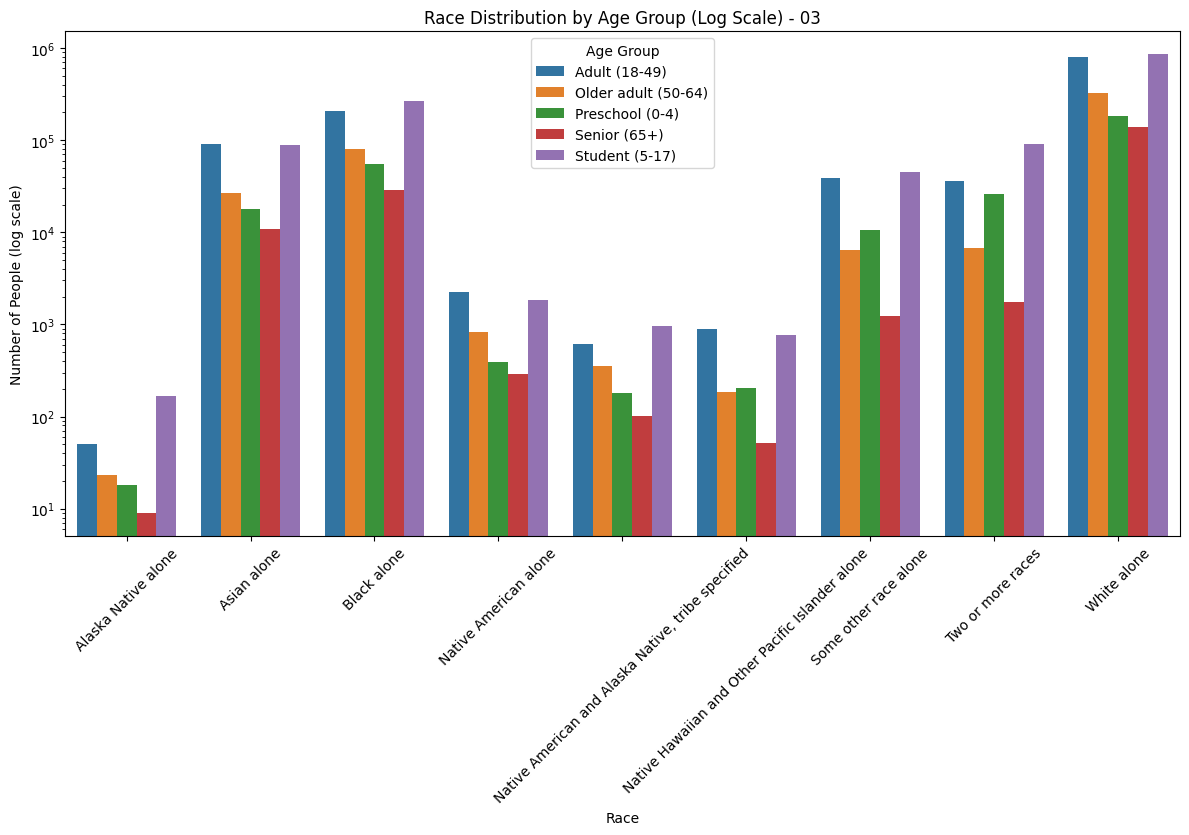

In [53]:
import pandas as pd

# Read the TSV file
df2 = pd.read_csv("run_03_vadelta_rate_limited_ticks.metadata.fixed_dates.tsv", sep="\t",skiprows=[1], dtype=str)

# Clean column names
df2.columns = df2.columns.str.strip()

# Drop any rows missing age_group or occupation
df2 = df2.dropna(subset=["age_group", "race"])

# Group and count
grouped = df2.groupby(["age_group", "race"]).size().reset_index(name="count")
filtered = grouped.dropna(subset=["age_group", "race"])

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x="race", y="count", hue="age_group")
plt.title("Race Distribution by Age Group (Log Scale) - 03")
plt.xlabel("Race")
plt.ylabel("Number of People (log scale)")
plt.yscale("log")  # ← This line enables log scale
plt.legend(title="Age Group")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

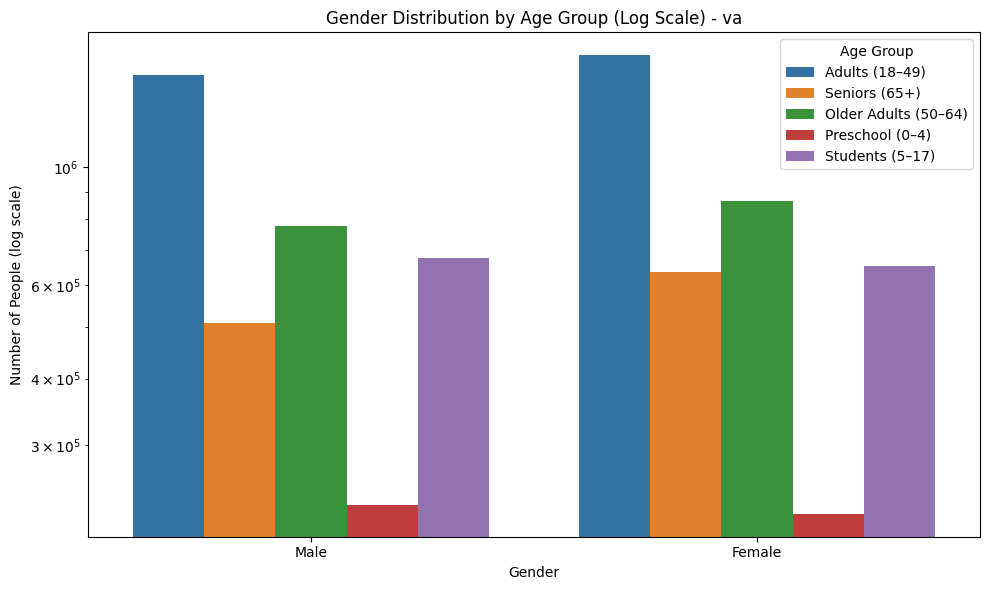

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data, skipping the description line
df = pd.read_csv("va_persontrait_epihiper.txt", sep=",", skiprows=1)

# Clean column names
df.columns = df.columns.str.strip()

# Drop any rows missing age_group or gender
df = df.dropna(subset=["age_group", "gender"])

# Group and count
grouped = df.groupby(["age_group", "gender"]).size().reset_index(name="count")

# Map age_group codes to labels
age_map = {
    "p": "Preschool (0–4)",
    "s": "Students (5–17)",
    "a": "Adults (18–49)",
    "o": "Older Adults (50–64)",
    "g": "Seniors (65+)"
}
grouped["age_label"] = grouped["age_group"].map(age_map)

# Map gender codes to labels
gender_map = {
    "1": "Male",
    "2": "Female"
}
grouped["gender_label"] = grouped["gender"].astype(str).map(gender_map)

# Drop rows with unknown mappings (just in case)
filtered = grouped.dropna(subset=["age_label", "gender_label"])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered, x="gender_label", y="count", hue="age_label")
plt.title("Gender Distribution by Age Group (Log Scale) - va")
plt.xlabel("Gender")
plt.ylabel("Number of People (log scale)")
plt.yscale("log")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


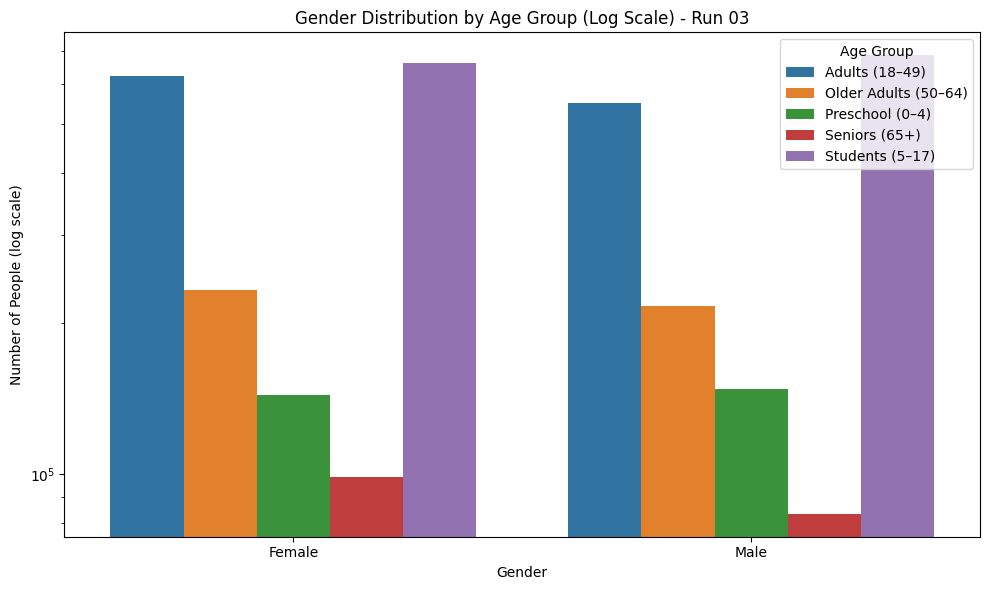

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the TSV file, skipping second line (China)
df2 = pd.read_csv("run_03_vadelta_rate_limited_ticks.metadata.fixed_dates.tsv", sep="\t", skiprows=[1], dtype=str)

# Clean column names
df2.columns = df2.columns.str.strip()

# Drop any rows missing age_group or gender
df2 = df2.dropna(subset=["age_group", "sex"])

# Group and count
grouped = df2.groupby(["age_group", "sex"]).size().reset_index(name="count")

# Map age_group codes to readable labels
age_map = {
    "p": "Preschool (0–4)",
    "s": "Students (5–17)",
    "a": "Adults (18–49)",
    "o": "Older Adults (50–64)",
    "g": "Seniors (65+)",
    "Preschool (0-4)": "Preschool (0–4)",
    "Student (5-17)": "Students (5–17)",
    "Adult (18-49)": "Adults (18–49)",
    "Older adult (50-64)": "Older Adults (50–64)",
    "Senior (65+)": "Seniors (65+)"
}
grouped["age_label"] = grouped["age_group"].map(age_map)

# Normalize and clean gender
gender_map = {
    "male": "Male",
    "female": "Female"
}
grouped["gender_label"] = grouped["sex"].str.lower().map(gender_map)

# Drop unmapped values
filtered = grouped.dropna(subset=["age_label", "gender_label"])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered, x="gender_label", y="count", hue="age_label")
plt.title("Gender Distribution by Age Group (Log Scale) - Run 03")
plt.xlabel("Gender")
plt.ylabel("Number of People (log scale)")
plt.yscale("log")
plt.legend(title="Age Group")
plt.tight_layout()
plt.show()


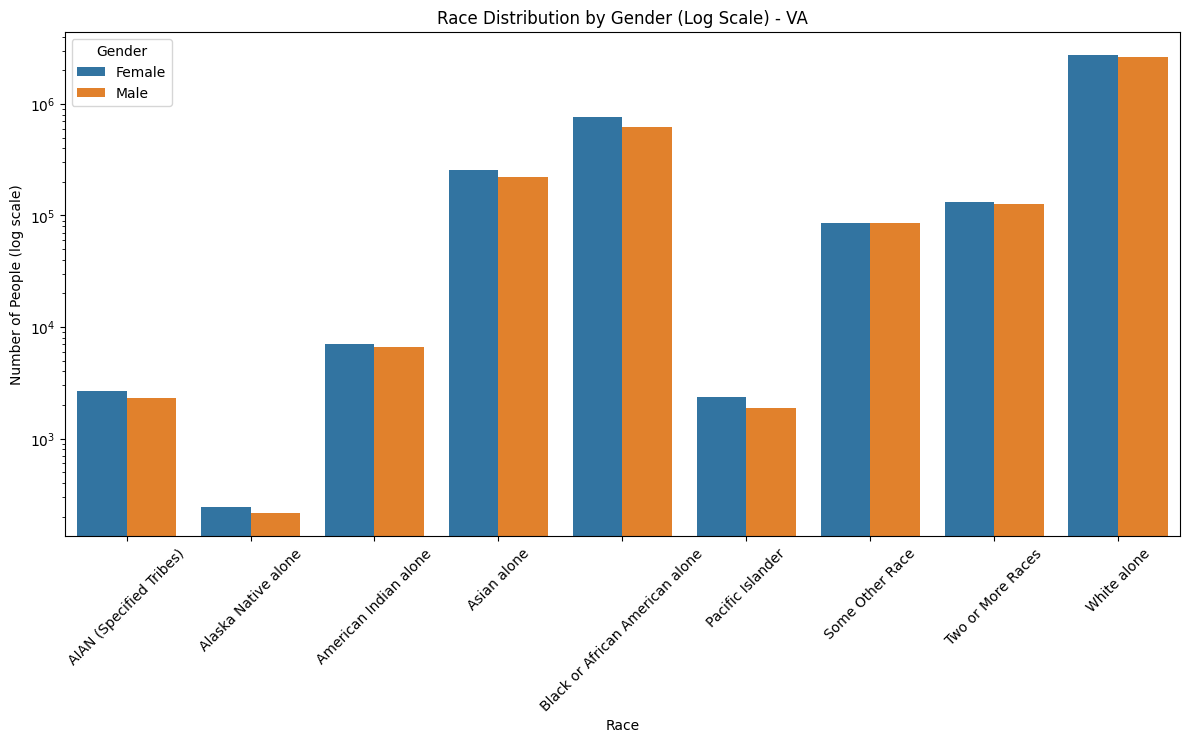

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv("va_persontrait_epihiper.txt", sep=",", skiprows=1)
df.columns = df.columns.str.strip()
df = df.dropna(subset=["gender", "race"])

# Map race codes
race_map = {
    "1": "White alone",
    "2": "Black or African American alone",
    "3": "American Indian alone",
    "4": "Alaska Native alone",
    "5": "AIAN (Specified Tribes)",
    "6": "Asian alone",
    "7": "Pacific Islander",
    "8": "Some Other Race",
    "9": "Two or More Races"
}
df["race_label"] = df["race"].astype(str).map(race_map)

# Map gender codes
gender_map = {
    "1": "Male",
    "2": "Female"
}
df["gender_label"] = df["gender"].astype(str).map(gender_map)

# Group and filter
grouped = df.groupby(["race_label", "gender_label"]).size().reset_index(name="count")
filtered = grouped.dropna(subset=["race_label", "gender_label"])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered, x="race_label", y="count", hue="gender_label")
plt.title("Race Distribution by Gender (Log Scale) - VA")
plt.xlabel("Race")
plt.ylabel("Number of People (log scale)")
plt.yscale("log")
plt.legend(title="Gender")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


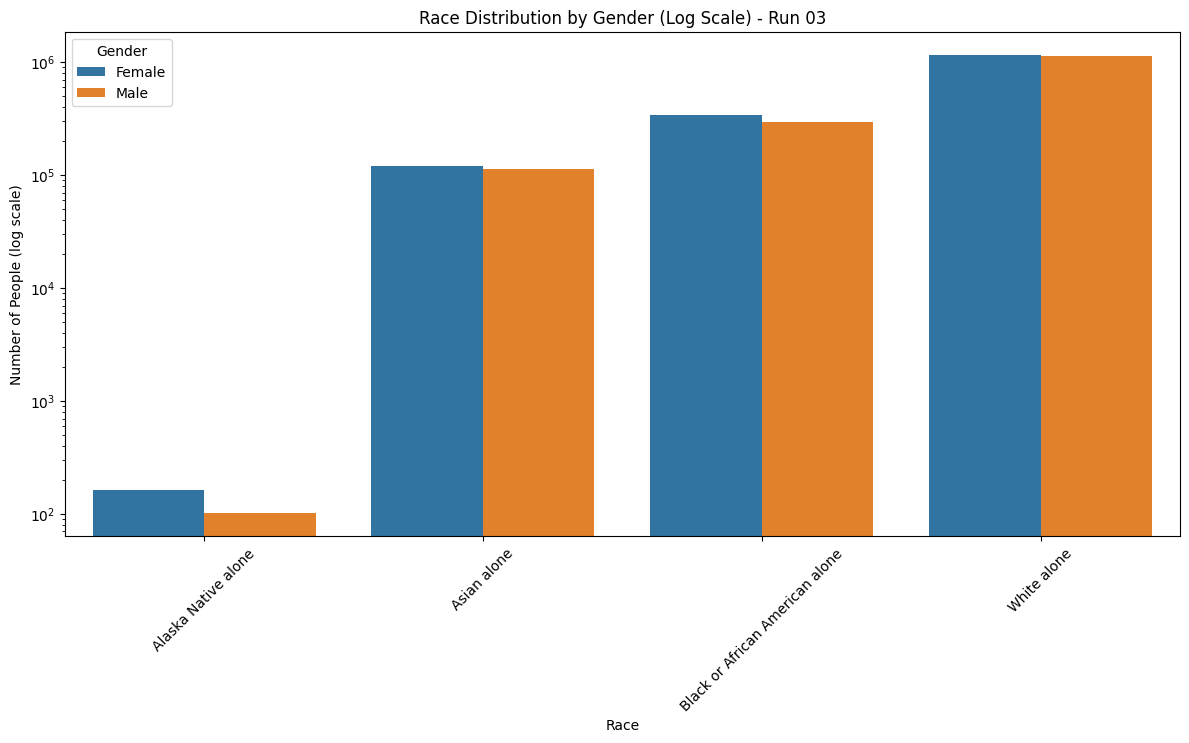

In [59]:
# Read and clean data
df2 = pd.read_csv("run_03_vadelta_rate_limited_ticks.metadata.fixed_dates.tsv", sep="\t", skiprows=[1], dtype=str)
df2.columns = df2.columns.str.strip()
df2 = df2.dropna(subset=["race", "sex"])

# Map race labels (as-is, no codes)
race_map_2 = {
    "White alone": "White alone",
    "Black alone": "Black or African American alone",
    "American Indian alone": "American Indian alone",
    "Alaska Native alone": "Alaska Native alone",
    "Asian alone": "Asian alone",
    "Pacific Islander": "Pacific Islander",
    "Some Other Race alone": "Some Other Race",
    "Two or More Races": "Two or More Races"
}
df2["race_label"] = df2["race"].str.strip().map(race_map_2)

# Clean gender
gender_map = {
    "male": "Male",
    "female": "Female"
}
df2["gender_label"] = df2["sex"].str.lower().map(gender_map)

# Group and filter
grouped2 = df2.groupby(["race_label", "gender_label"]).size().reset_index(name="count")
filtered2 = grouped2.dropna(subset=["race_label", "gender_label"])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered2, x="race_label", y="count", hue="gender_label")
plt.title("Race Distribution by Gender (Log Scale) - Run 03")
plt.xlabel("Race")
plt.ylabel("Number of People (log scale)")
plt.yscale("log")
plt.legend(title="Gender")
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd

# Load and clean
df = pd.read_csv("va_persontrait_epihiper.txt", sep=",", skiprows=1, keep_default_na=False)
df.columns = df.columns.str.strip()
df['county_fips'] = df['county_fips'].astype(str).str.zfill(5)
df['race'] = df['race'].astype(str).str.strip()


In [ ]:
race_map = {
    "1": "White alone",
    "2": "Black or African American alone",
    "3": "American Indian alone",
    "4": "Alaska Native alone",
    "5": "American Indian & Alaska Native (specified)",
    "6": "Asian alone",
    "7": "Native Hawaiian / Pacific Islander",
    "8": "Some Other Race alone",
    "9": "Two or More Races"
}
df['race_label'] = df['race'].map(race_map)

grouped = df.groupby(['county_fips', 'race_label']).size().reset_index(name='count')
top_race = grouped.sort_values(['county_fips', 'count'], ascending=[True, False]) \
                  .drop_duplicates(subset='county_fips')


import plotly.express as px
import plotly.io as pio
pio.renderers.default = "browser"

fig = px.choropleth(
    top_race,
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    locations='county_fips',
    color='race_label',
    scope="usa",
    title="Top Race by Virginia County"
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


In [ ]:
import pandas as pd
import plotly.express as px
import plotly.io as pio

# Set plotly to open in browser
pio.renderers.default = "browser"

# Load data
df = pd.read_csv("va_persontrait_epihiper.txt", sep=",", skiprows=1, keep_default_na=False)
df.columns = df.columns.str.strip()

# Ensure county_fips is 5-digit string
df['county_fips'] = df['county_fips'].astype(str).str.zfill(5)
df['age_group'] = df['age_group'].str.strip()

# Map age group codes to labels
age_map = {
    "p": "Preschool (0-4)",
    "s": "Students (5-17)",
    "a": "Adults (18-49)",
    "o": "Older Adults (50-64)",
    "g": "Seniors (65+)"
}
df['age_label'] = df['age_group'].map(age_map)

# Group and find top age group per county
grouped = df.groupby(['county_fips', 'age_label']).size().reset_index(name='count')
top_age = grouped.sort_values(['county_fips', 'count'], ascending=[True, False]) \
                 .drop_duplicates(subset='county_fips')

# Plot map
fig = px.choropleth(
    top_age,
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    locations='county_fips',
    color='age_label',
    scope="usa",
    title="Top Age Group by Virginia County",
    labels={"age_label": "Top Age Group"}
)

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()
